In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

In [17]:
df=pd.read_csv('OnlineNewsPopularity.csv')
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [18]:
df.shape

(39644, 61)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [20]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


Now we want to pre-process the dataset, and we want here to just keep in our dataset the values that allow us to predict features.

In [21]:
non_predict_feat=['url',' timedelta']
df.drop(non_predict_feat,axis=1,inplace=True)
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [22]:
#We can see that there is a space before some columns name:
df.columns = df.columns.str.strip()
df.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

Now we are going to encode the following columns 

## DATA VISUALISATION

## <span style="color:blue">Part 1: DATASET visualisation:</span>

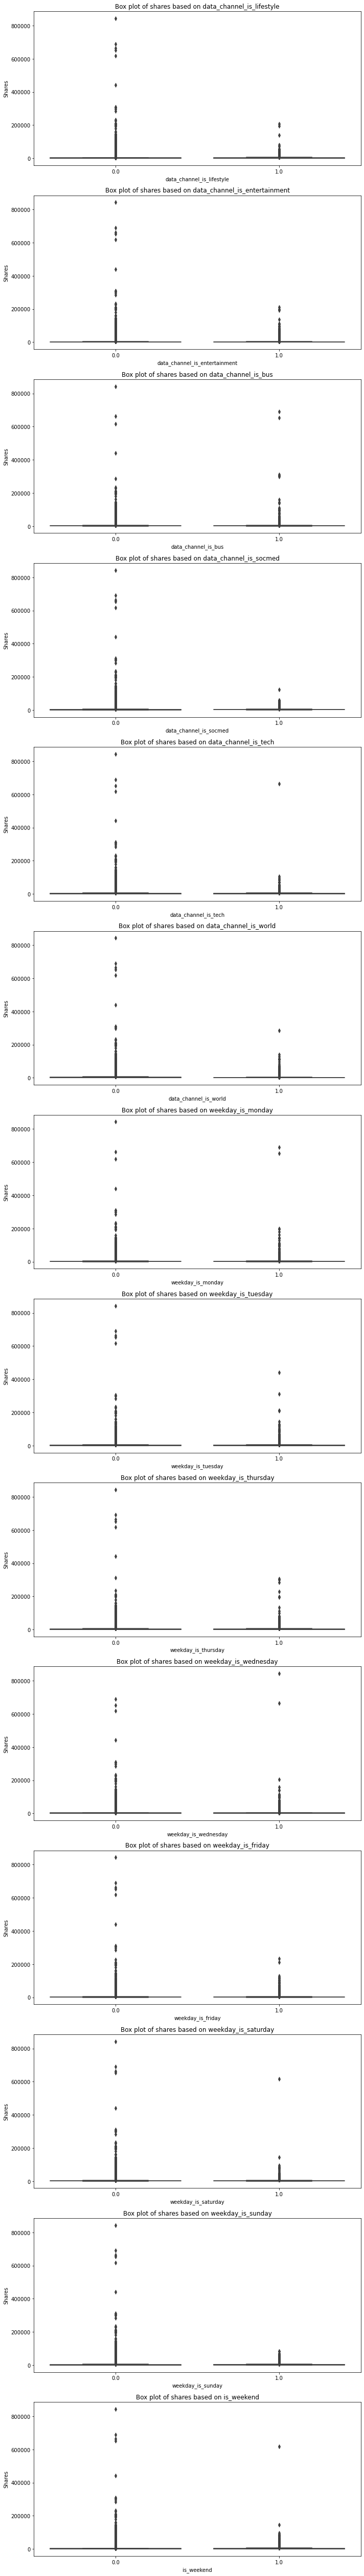

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_thursday', 'weekday_is_wednesday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']

# Assuming you have a DataFrame named df containing your data
# Adjust this line based on your actual DataFrame name and structure
# df = ...

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10, 5 * len(categorical_features)))

# Loop through categorical features
for i, feature in enumerate(categorical_features):
    # Create subplots
    ax = axes[i]
    
    # Plot box plot for 'shares' for each category
    sns.boxplot(x=feature, y='shares', data=df, ax=ax)
    
    # Set plot title and labels
    ax.set_title(f'Box plot of shares based on {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Shares')

# Adjust layout
plt.tight_layout()
plt.show()


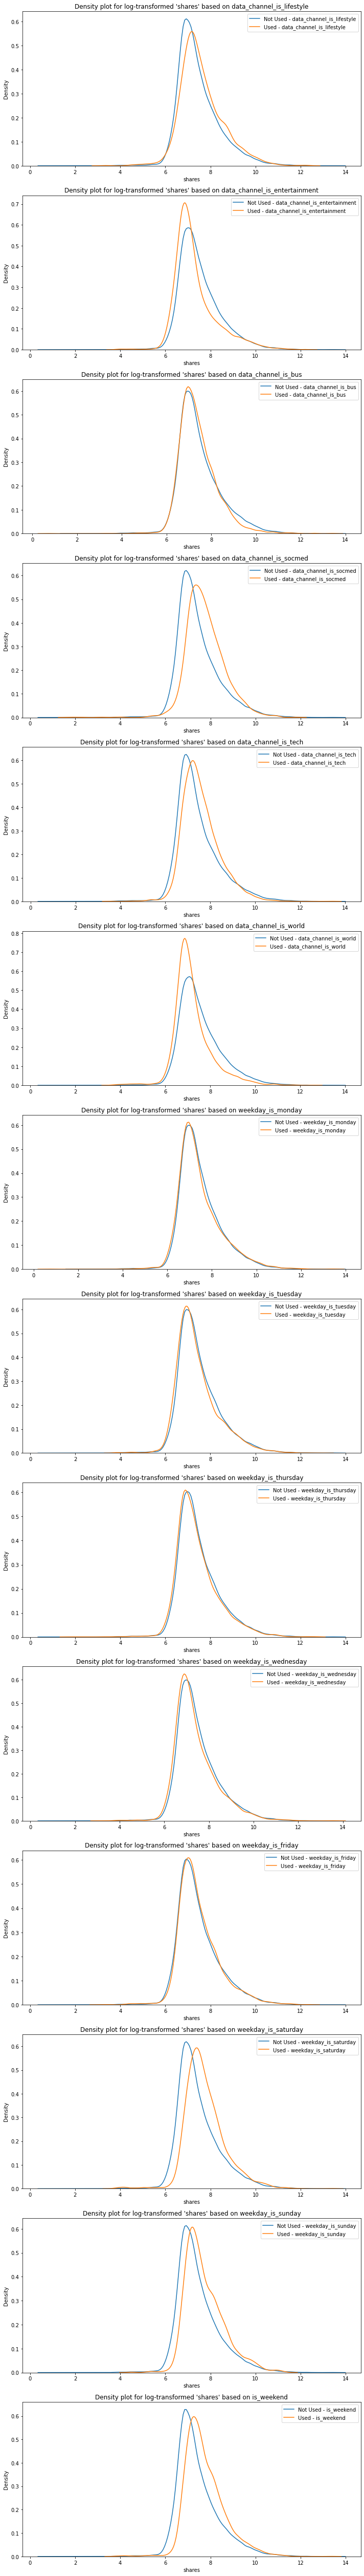

In [26]:
categorical_features = ['data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_thursday', 'weekday_is_wednesday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend']

# Assuming you have a DataFrame named df containing your data
# Adjust this line based on your actual DataFrame name and structure
# df = ...

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10, 5 * len(categorical_features)))

# Loop through categorical features
for i, feature in enumerate(categorical_features):
    # Create subplots
    ax = axes[i]
    
    # Plot kernel density estimate for log-transformed 'shares' for each category
    sns.kdeplot(data=np.log1p(df[df[feature] == 0]['shares']), label="Not Used - " + feature, ax=ax)
    sns.kdeplot(data=np.log1p(df[df[feature] == 1]['shares']), label="Used - " + feature, ax=ax)
    
    # Set plot title and legend
    ax.set_title(f"Density plot for log-transformed 'shares' based on {feature}")
    ax.legend()

# Adjust layout
plt.tight_layout()
plt.show()


## <span style="color:blue">Part 2: DATA Encoding & Normalization</span>

In [28]:
categorical_features = ['data_channel_is_lifestyle', 'data_channel_is_entertainment','data_channel_is_bus', 'data_channel_is_socmed','data_channel_is_tech', 'data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_thursday','weekday_is_wednesday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']
label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [29]:
#check if there are missing values:
df.isnull().sum()

n_tokens_title                   0
n_tokens_content                 0
n_unique_tokens                  0
n_non_stop_words                 0
n_non_stop_unique_tokens         0
num_hrefs                        0
num_self_hrefs                   0
num_imgs                         0
num_videos                       0
average_token_length             0
num_keywords                     0
data_channel_is_lifestyle        0
data_channel_is_entertainment    0
data_channel_is_bus              0
data_channel_is_socmed           0
data_channel_is_tech             0
data_channel_is_world            0
kw_min_min                       0
kw_max_min                       0
kw_avg_min                       0
kw_min_max                       0
kw_max_max                       0
kw_avg_max                       0
kw_min_avg                       0
kw_max_avg                       0
kw_avg_avg                       0
self_reference_min_shares        0
self_reference_max_shares        0
self_reference_avg_s

In [10]:
#Normalization process
#we are excluding categorical_features + ['shares'] from the normalization because the categorical_features are not meaningful as they are not continuous.
#and in regression machine learning process it is common not to normalize the target feature.

numerical_features = df.columns.difference(categorical_features + ['shares'])
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])


In [30]:
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


## <span style="color:blue">Part 3: Train & test DATA visualization:</span>



In [31]:
#Now we split the train and test features:
x = df.drop('shares', axis=1)
y = df['shares']

In [32]:
#here we are creating the variable X_train, X_test, y_train, y_test, by taking 80% of the values of the dataset as training data and 20% as the testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [33]:
train_data = pd.concat([X_train, y_train], axis=1)

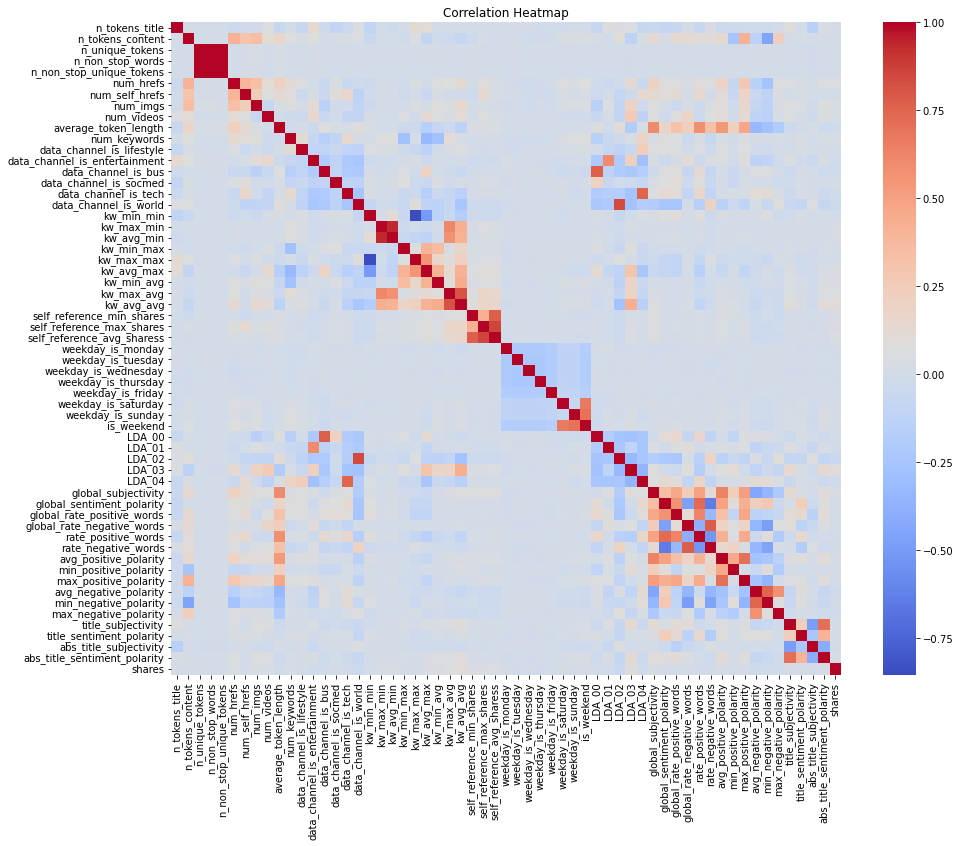

In [34]:
# Plotting correlation heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(train_data.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

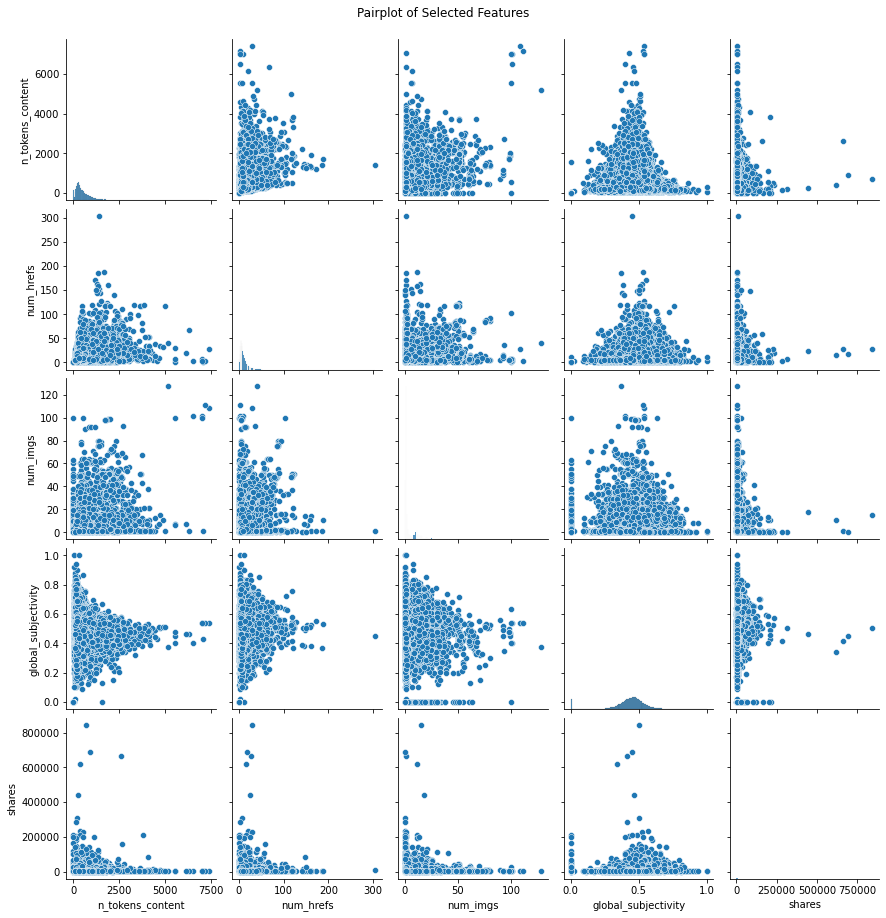

In [35]:
# Pairplot for selected features
selected_features = ['n_tokens_content', 'num_hrefs', 'num_imgs', 'global_subjectivity', 'shares']
sns.pairplot(train_data[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

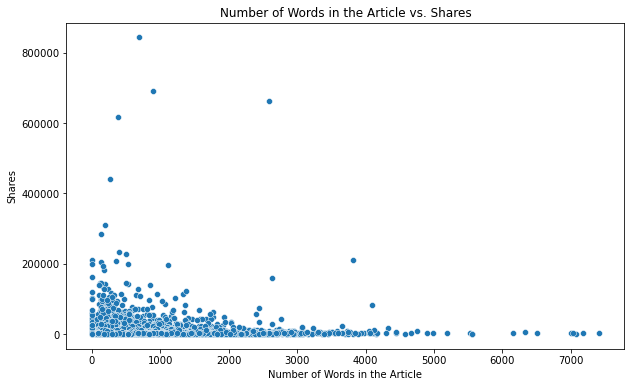

In [36]:
# Scatter plot for a specific feature against the target
plt.figure(figsize=(10, 6))
sns.scatterplot(x='n_tokens_content', y='shares', data=train_data)
plt.title('Number of Words in the Article vs. Shares')
plt.xlabel('Number of Words in the Article')
plt.ylabel('Shares')
plt.show()

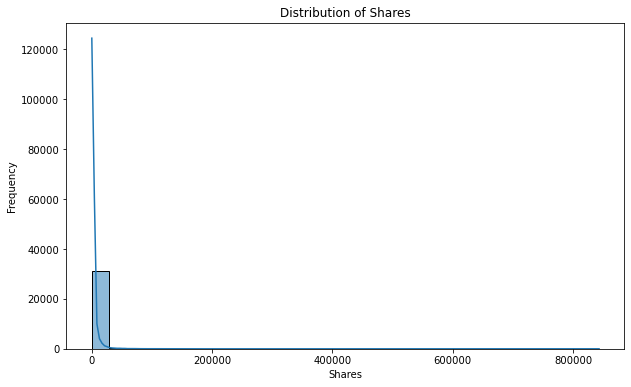

In [37]:
#Distribution of the Target Variable
plt.figure(figsize=(10, 6))
sns.histplot(train_data['shares'], bins=30, kde=True)
plt.title('Distribution of Shares')
plt.xlabel('Shares')
plt.ylabel('Frequency')
plt.show()

We can see on the graph above that the variable "Shares" is distributed in a quite unbalenced way so we can study its distribution:

count     31715.000000
mean       3412.369541
std       11781.905900
min           1.000000
25%         948.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64


C:\Users\lucas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


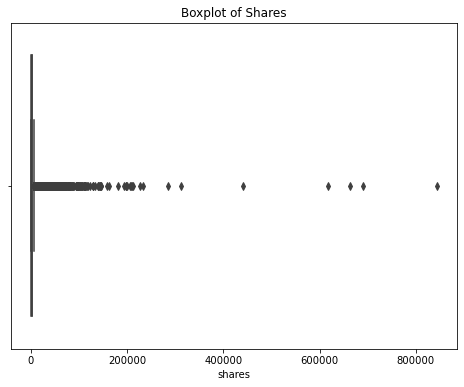

In [38]:
# Statistiques descriptives
print(train_data['shares'].describe())

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(train_data['shares'])
plt.title('Boxplot of Shares')
plt.show()

In fact as we can see, there are extreme values and a huge amount of share between 0 and 200000

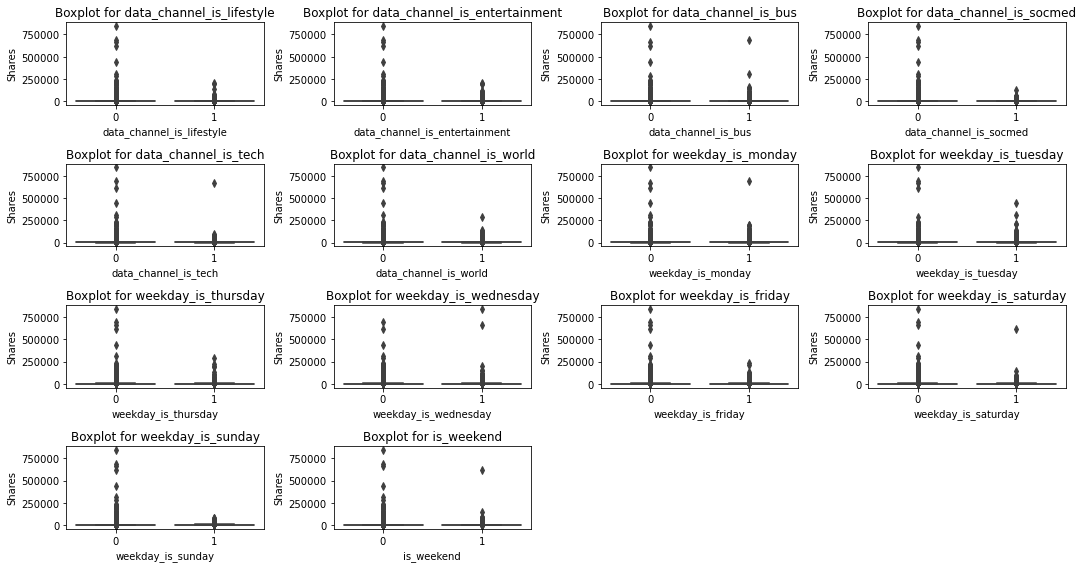

In [39]:
categorical_features = ['data_channel_is_lifestyle', 'data_channel_is_entertainment','data_channel_is_bus', 'data_channel_is_socmed','data_channel_is_tech', 'data_channel_is_world','weekday_is_monday','weekday_is_tuesday','weekday_is_thursday','weekday_is_wednesday','weekday_is_friday','weekday_is_saturday','weekday_is_sunday','is_weekend']

plt.figure(figsize=(15, 8))
for feature in categorical_features:
    plt.subplot(4, 4, categorical_features.index(feature) + 1)
    sns.boxplot(x=feature, y='shares', data=train_data)
    plt.title(f'Boxplot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Shares')
plt.tight_layout()
plt.show()

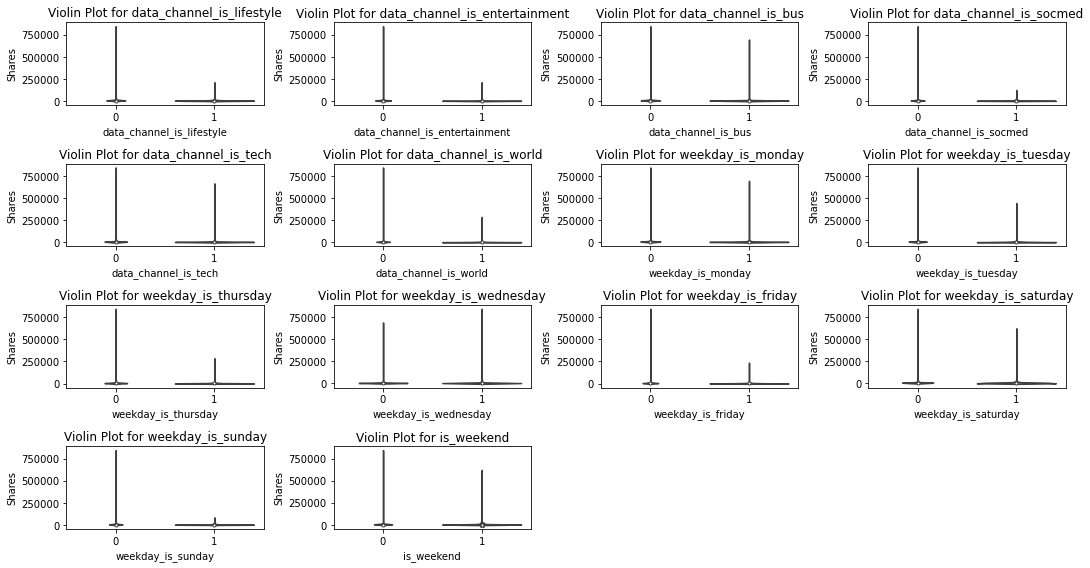

In [40]:
#Violin plot for categorical features
plt.figure(figsize=(15, 8))
for feature in categorical_features:
    plt.subplot(4, 4, categorical_features.index(feature) + 1)
    sns.violinplot(x=feature, y='shares', data=train_data)
    plt.title(f'Violin Plot for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Shares')
plt.tight_layout()
plt.show()

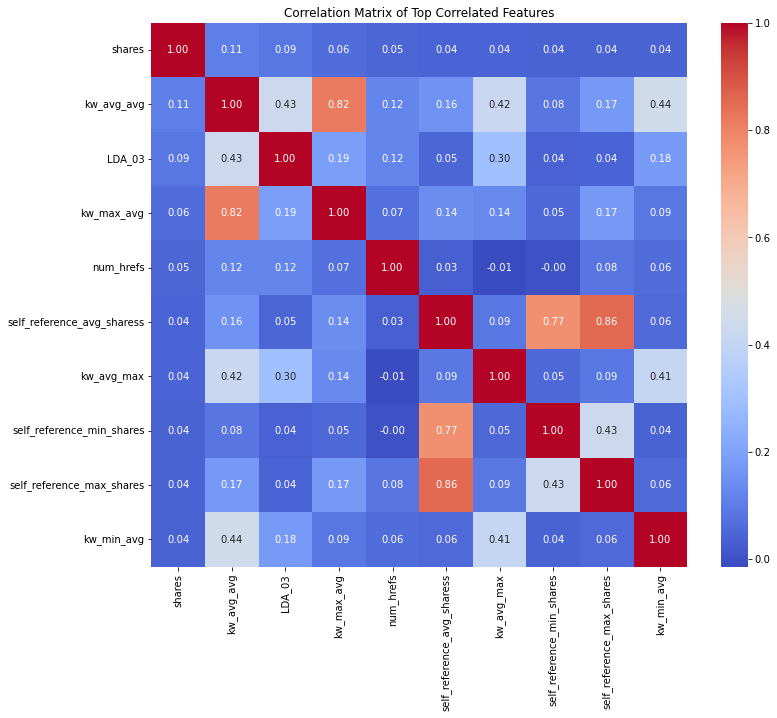

In [41]:
#Correlation Matrix for Top Correlated Features:
top_correlated_features = train_data.corr().nlargest(10, 'shares')['shares'].index
correlation_matrix = np.corrcoef(train_data[top_correlated_features].values.T)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=top_correlated_features.values, yticklabels=top_correlated_features.values)
plt.title('Correlation Matrix of Top Correlated Features')
plt.show()

Now we will start the modeling part using some algorithm:

In [22]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [23]:
# Define the algorithms and their hyperparameter grids
algorithms = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regression': SVR()
}

In [24]:
param_grids = {
    'Random Forest': {'n_estimators': [50, 100, 150],
                      'max_depth': [None, 10, 20, 30]},
    'Gradient Boosting': {'n_estimators': [50, 100, 150],
                          'learning_rate': [0.01, 0.1, 0.2],
                          'max_depth': [3, 4, 5]},
    'Support Vector Regression': {'C': [1, 10, 100],
                                  'kernel': ['linear', 'rbf']}
}


In [30]:
# Function for grid search and model evaluation
def evaluate_model(model, X, y, param_grid=None):
    print(f"Evaluating {type(model).__name__} model...")
    
    if param_grid:
        print(f"Performing grid search for {type(model).__name__}...")
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=1)
        grid_search.fit(X, y)
        model = grid_search.best_estimator_
    else:
        print(f"Fitting {type(model).__name__} model...")
        model.fit(X, y)
    
    print(f"Performing cross-validation for {type(model).__name__}...")
    # Cross-validated performance metrics
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)
    
    # Display numerical metrics
    mean_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)
    print(f"Mean RMSE: {mean_rmse:.2f}")
    print(f"Standard Deviation of RMSE: {std_rmse:.2f}")
    
    # Plot distribution of cross-validated scores
    plt.figure(figsize=(10, 6))
    sns.histplot(rmse_scores, kde=True)
    plt.title(f'Distribution of RMSE Scores for {type(model).__name__}')
    plt.xlabel('Root Mean Squared Error (RMSE)')
    plt.show()
    
    print(f"{type(model).__name__} evaluation complete.")


In [29]:
"""# Iterate through algorithms and evaluate
for algorithm_name, algorithm in algorithms.items():
    print(f"---- {algorithm_name} ----")
    evaluate_model(algorithm, X_train, y_train, param_grids.get(algorithm_name, None))"""
#Here is the code for the whole dataset but it takes too much time to do the regression so we decided to take only 20000 samples:

'# Iterate through algorithms and evaluate\nfor algorithm_name, algorithm in algorithms.items():\n    print(f"---- {algorithm_name} ----")\n    evaluate_model(algorithm, X_train, y_train, param_grids.get(algorithm_name, None))'

In [27]:
df.size

2338996

---- Linear Regression ----
Evaluating LinearRegression model...
Fitting LinearRegression model...
Performing cross-validation for LinearRegression...
Mean RMSE: 12759.75
Standard Deviation of RMSE: 4147.96


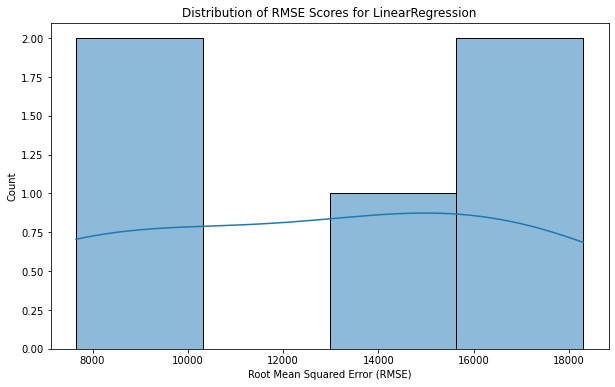

LinearRegression evaluation complete.
---- Random Forest ----
Evaluating RandomForestRegressor model...
Performing grid search for RandomForestRegressor...
Performing cross-validation for RandomForestRegressor...
Mean RMSE: 13413.22
Standard Deviation of RMSE: 3868.57


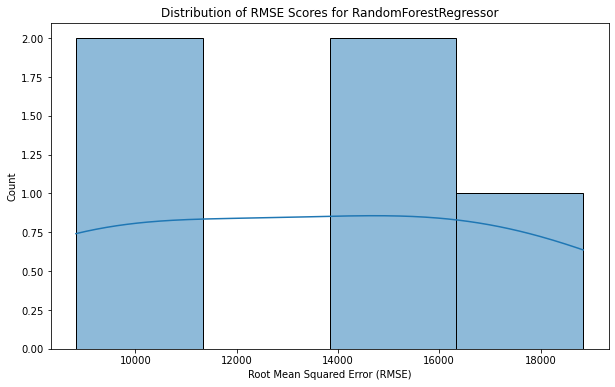

RandomForestRegressor evaluation complete.
---- Gradient Boosting ----
Evaluating GradientBoostingRegressor model...
Performing grid search for GradientBoostingRegressor...
Performing cross-validation for GradientBoostingRegressor...
Mean RMSE: 12770.47
Standard Deviation of RMSE: 4315.69


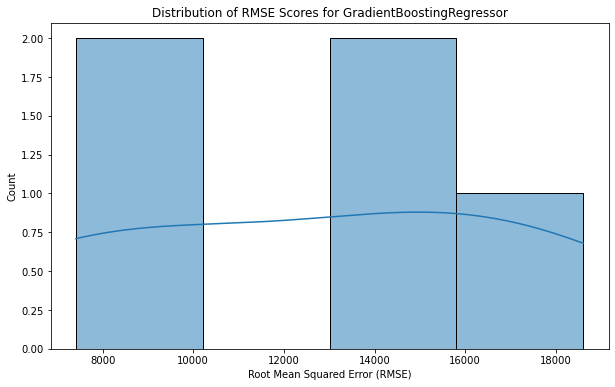

GradientBoostingRegressor evaluation complete.
---- Support Vector Regression ----
Evaluating SVR model...
Performing grid search for SVR...
Performing cross-validation for SVR...
Mean RMSE: 12886.96
Standard Deviation of RMSE: 4191.71


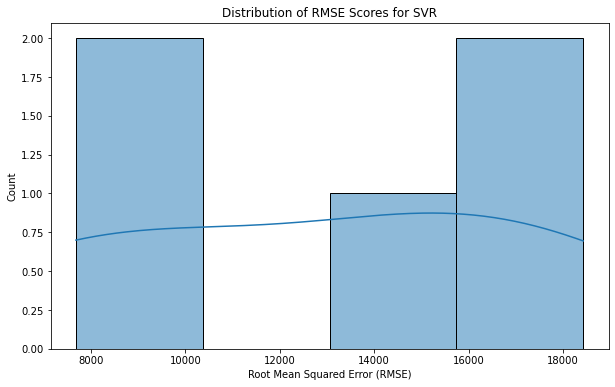

SVR evaluation complete.


In [31]:
# Randomly select a subset of the data with 500,000 samples
subset_size = 20000
df_subset = df.sample(n=subset_size, random_state=42)

# Split the subset into features (X_subset) and target variable (y_subset)
X_subset = df_subset.drop('shares', axis=1)
y_subset = df_subset['shares']

# Split the subset into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(X_subset, y_subset, test_size=0.2, random_state=42)

# Continue with the rest of the code using the subset
# ...

# Iterate through algorithms and evaluate with the subset
for algorithm_name, algorithm in algorithms.items():
    print(f"---- {algorithm_name} ----")
    evaluate_model(algorithm, X_train_subset, y_train_subset, param_grids.get(algorithm_name, None))
